In [1]:
import numpy as np
import matplotlib.pyplot as plt

from auto_robot_design.optimization.problems import MultiCriteriaProblem
from auto_robot_design.optimization.optimizer import PymooOptimizer
from auto_robot_design.optimization.saver import load_checkpoint

In [2]:
import tkinter as tk
from tkinter import filedialog

def select_directory():
    # Create a root window
    root = tk.Tk()
    # Hide the root window
    root.withdraw()
    # Make the root window the topmost window
    root.call('wm', 'attributes', '.', '-topmost', True)
    # Open directory dialog and store the selected directory path
    directory_path = filedialog.askdirectory(initialdir="./",
        title="Select a directory"
    )
    root.update_idletasks() 
    root.destroy()
    # Check if a directory was selected
    if directory_path:
        #print(f"Selected directory: {directory_path}")
        return directory_path
    else:
        #print("No directory selected")
        return None

# Call the function to open the directory dialog
selected_directory = select_directory()
print(f"Resulting directory path: {selected_directory}")

Resulting directory path: /home/be2r-lab-210134/Python/auto-robotics-diesign/auto-robotics-design/apps/experiments/all_topologies_acc_hl_six_trajectories/results/first_setup/all_topologies_10gen_64pop


In [3]:
import os 
from pathlib import Path
subfolders = [os.path.join(selected_directory, f) for f in os.scandir(selected_directory) if f.is_dir()]

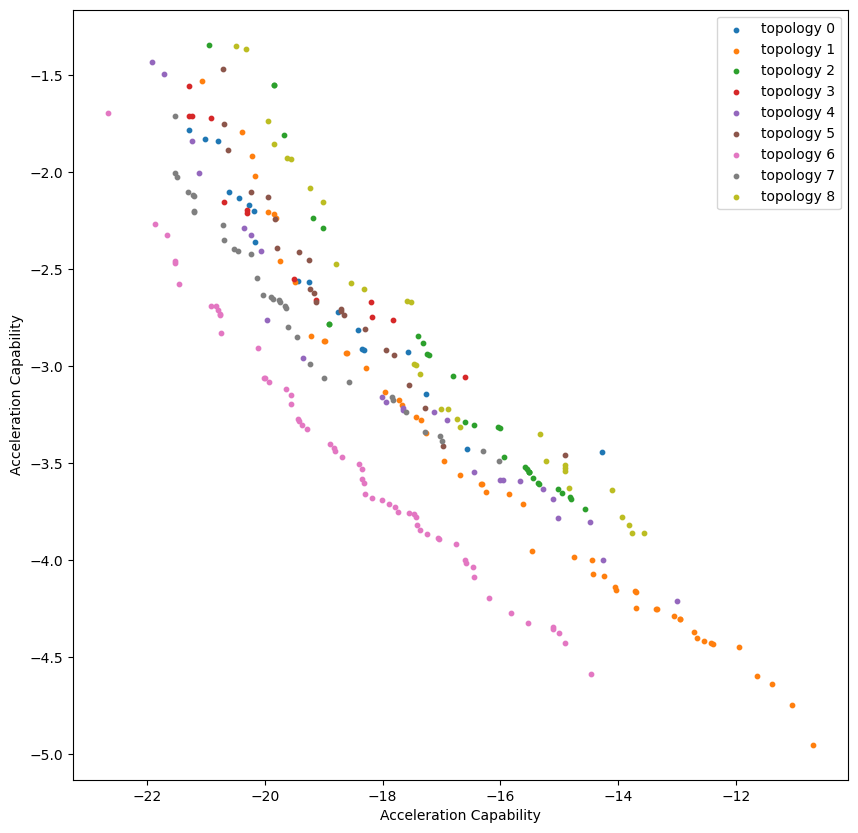

In [4]:
labels = []

plt.figure(figsize=(10, 10))
for idx, dir in enumerate(subfolders):
    problem = MultiCriteriaProblem.load(
        dir
    )
    
    checkpoint = load_checkpoint(dir)
    optimizer = PymooOptimizer(problem, checkpoint)
    optimizer.load_history(dir)
    res = optimizer.run()
    F = res.F
    plt.scatter(res.F[:,0], res.F[:,1],s=10)
    labels.append(f"topology {idx}")
history_mean = optimizer.history["Mean"]
reward_labels = []
for trajectory_idx, rewards in problem.rewards_and_trajectories.rewards.items():
    for reward in rewards:
        reward_labels.append(reward[0].reward_name)
plt.legend(labels)
plt.xlabel(reward_labels[0])
plt.ylabel(reward_labels[1])
plt.show()